LOGISTIC REGRESSION

In statistics logistic regression is used to model the probability of a certain class or event. 
Logistic regression is similar to linear regression because both of these involve 
estimating the values of parameters used in the prediction equation based on the given training data. 
Linear regression predicts the value of some continuous, dependent variable. 
Whereas logistic regression predicts the probability of an event or class that is dependent on other factors. 
Thus the output of logistic regression always lies between 0 and 1. Because of this property 
it is commonly used for classification purpose.


Logistic Model
Consider a model with features x1, x2, x3 … xn. Let the binary output be denoted by Y, that can take the values 0 or 1.
Let p be the probability of Y = 1, we can denote it as p = P(Y=1).

Here the term p/(1−p) is known as the odds and denotes the likelihood of the event taking place. 
Thus ln(p/(1−p)) is known as the log odds and is simply used to map the probability that lies between 
0 and 1 to a range between (−∞,+∞). The terms b0, b1, b2… are parameters (or weights) that we will estimate during training.
So this is just the basic math behind what we are going to do. We are interested in the
probability p in this equation. So we simplify the equation to obtain the value of p:
The log term ln on the LHS can be removed by raising the RHS as a power of e:
    
    
Now we will be using the above derived equation to make our predictions. Before that we will train our model to obtain the values of our parameters b0, b1, b2… that result in least error. This is where the error or loss function comes in.

Loss Function
The loss is basically the error in our predicted value. 
In other words it is a difference between our predicted value and the actual value.
We will be using the L2 Loss Function to calculate the error. 
Theoretically you can use any function to calculate the error. 
This function can be broken down as:

Let the actual value be yᵢ. 
Let the value predicted using our model be denoted as ȳᵢ.
Find the difference between the actual and predicted value.
Square this difference.
Find the sum across all the values in training data
    
    
Now that we have the error, we need to update the values of our parameters to minimize this error.
This is where the “learning” actually happens, since our model is updating itself based on
it’s previous output to obtain a more accurate output in the next step.
Hence with each iteration our model becomes more and more accurate. We will be using the 
Gradient Descent Algorithm to estimate our parameters.
Another commonly used algorithm is the Maximum Likelihood Estimation.  



The Gradient Descent Algorithm
You might know that the partial derivative of a function at it’s minimum value is equal to 0.
So gradient descent basically uses this concept to estimate the parameters or weights of our 
model by minimizing the loss function. Click here for a more detailed explanation on how gradient descent works.
For simplicity, for the rest of this tutorial let us assume that our output depends only on a single feature x. 
So we can rewrite our equation as:


Thus we need to estimate the values of weights b0 and b1 using our given training data.

Initially let b0=0 and b1=0. Let L be the learning rate. 
The learning rate controls by how much the values of b0 and b1 are updated at 
each step in the learning process. Here let L=0.001.
Calculate the partial derivative with respect to b0 and b1. 
The value of the partial derivative will tell us how far the loss function is 
from it’s minimum value. It is a measure of how much our weights need to be updated 
to attain minimum or ideally 0 error. In case you have more than one feature,
you need to calculate the partial derivative for each weight b0, b1 … bn where n is
the number of features.



3. Next we update the values of b0 and b1:


4. We repeat this process until our loss function is a very small value or ideally reaches 0 
(meaning no errors and 100% accuracy). The number of times we repeat this learning process is known as iterations or epochs.

Implementing the Model
Import the necessary libraries and download the data set here. T
he data was taken from kaggle and describes information about a product being purchased through an advertisement on social media. 
We will be predicting the value of Purchased and consider a single feature,
Age to predict the values of Purchased. You can have multiple features as well.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
import math as mt

plt.rcParams["figure.figsize"] = (6, 6)


data = pd.read_csv('Network.csv')
print(data.head(5))


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


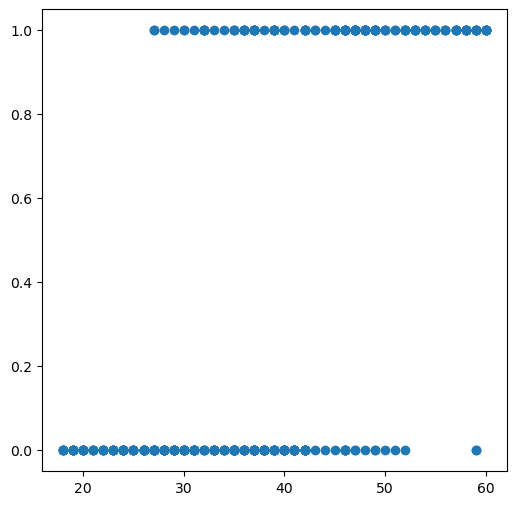

None


In [7]:
plt.scatter(data['Age'] ,data['Purchased'])
print(plt.show())





In [9]:
# Divide the train data and test data 


X_train , X_test , y_train , y_test = train_test_split(data['Age'] , data['Purchased'] , test_size = 0.2)

print(X_train)
print(X_test)
print(y_train)
print(y_test)





355    60
82     20
257    40
390    48
371    60
       ..
106    26
116    35
154    40
131    33
347    54
Name: Age, Length: 320, dtype: int64
54     27
236    40
271    59
312    38
97     28
       ..
295    36
218    46
169    29
180    26
189    28
Name: Age, Length: 80, dtype: int64
355    1
82     0
257    0
390    1
371    1
      ..
106    0
116    0
154    0
131    0
347    1
Name: Purchased, Length: 320, dtype: int64
54     0
236    0
271    1
312    0
97     1
      ..
295    0
218    0
169    0
180    0
189    0
Name: Purchased, Length: 80, dtype: int64


In [16]:
# Creating the logistic regression model

# Helper function to normalize data
def normalize(X):
    return X - X.mean()

# Method to make predictions
def predict(X, b0, b1):
    return np.array([1 / (1 + mt.exp(-1*b0 + -1*b1*x)) for x in X])

# Method to train the model
def logistic_regression(X, Y):

    X = normalize(X)

    # Initializing variables
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
        # Update b0 and b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    
    return b0, b1



    
   
    
    




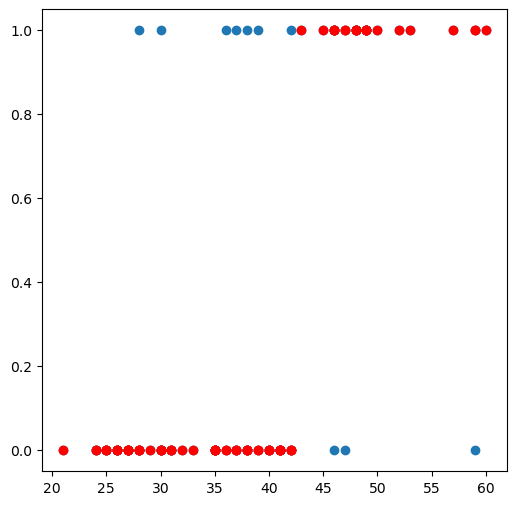

Accuracy = 0.875


In [17]:
# Training the model
b0, b1 = logistic_regression(X_train, y_train)

# Making predictions
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
plt.show()

# The accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")


Logistic Regression using Sklearn

C:\Users\hjha0\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


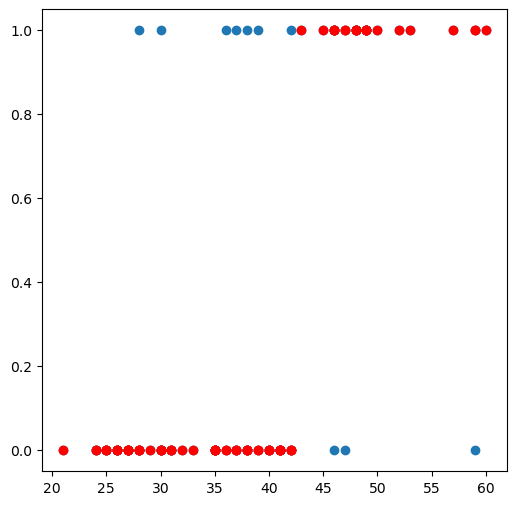

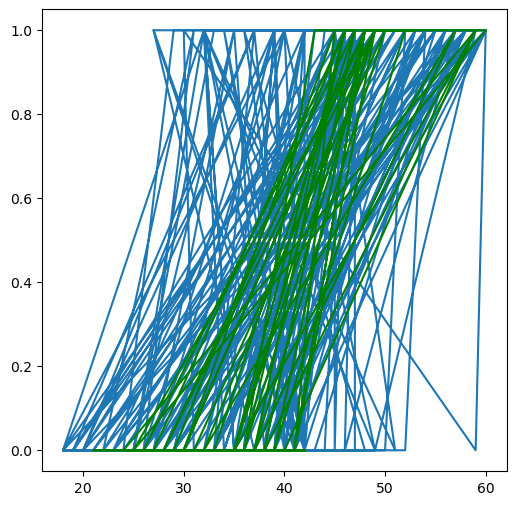

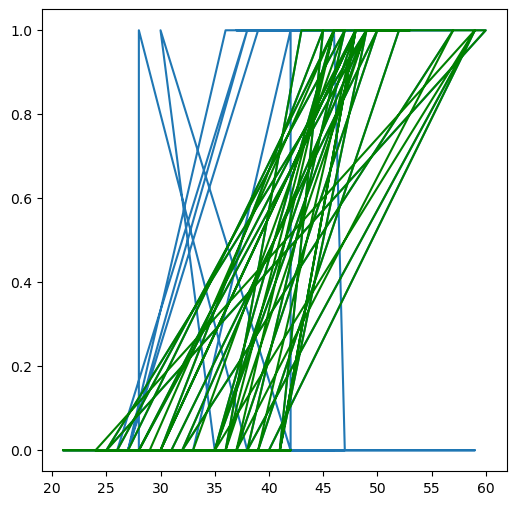

Accuracy = 0.875


In [21]:
# Making predictions using scikit learn
from sklearn.linear_model import LogisticRegression

# Create an instance and fit the model 
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

# Making predictions
y_pred_sk = lr_model.predict(X_test.values.reshape(-1, 1))

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()

"""
plt.plot(X_train , y_train)
plt.plot(X_test , y_pred_sk , color='green')
plt.show()

plt.plot(X_test , y_test)
plt.plot(X_test , y_pred_sk , color='green')
plt.show()
"""




# Accuracy
print(f"Accuracy = {lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))}")
